In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
marks = {'name':['arun', 'jane', 'jill', 'grey', 'mark'],
        'physics':[99, 92, 78, 84, 9],
         'chem':[93, 99, 100, 78, 67],
        'roll':[10,11, 45, 3, 7]
        }

In [4]:
d1 = DataFrame(marks, columns=['name', 'physics', 'chem'],
              index=marks['roll'])
d1             # Just to visualise datafame in tabular form in Jupyter notebook
#print d1
#print type(d1)

,name,physics,chem
10,arun,99,93
11,jane,92,99
45,jill,78,100
3,grey,84,78
7,mark,9,67


Row Index is [0,1,2,3,4]
Col Index ['name', 'physics', 'chem']

In [5]:
path = './pcm_marks.csv'
d2 = pd.read_csv(path, header=None, 
                 names=['Name','Phy','Chem'],
                index_col=1)
d2.index.name= 'Roll No'
d2.columns.name = 'Name & Marks'
d2

Name & Marks,Name,Phy,Chem
Roll No,,,
10,mehul,99,93
11,jane,95,80
3,jill,100,88
5,grey,67,79
7,mark,88,89


In [6]:
path = './math_marks.csv'
d3 = pd.read_csv(path, header=None, 
                      index_col=0, names=['Maths'])
d3


,Maths
11,100
3,98
10,90
5,91
7,56


In [7]:
d2['Maths'] = d3
d2

Name & Marks,Name,Phy,Chem,Maths
Roll No,,,,
10,mehul,99,93,90
11,jane,95,80,100
3,jill,100,88,98
5,grey,67,79,91
7,mark,88,89,56


In [1]:
#print d2['Phy']
#print d2['Phy', 'Maths'] # some error investigate later

In [9]:
print(d2)
#print(d2.loc[3])
#print(d2.iloc[-1])
print(d2.loc[[3,7]])

Name & Marks   Name  Phy  Chem  Maths
Roll No                              
10            mehul   99    93     90
11             jane   95    80    100
3              jill  100    88     98
5              grey   67    79     91
7              mark   88    89     56
Name & Marks  Name  Phy  Chem  Maths
Roll No                             
3             jill  100    88     98
7             mark   88    89     56


loc provides Row + Col Indexing

In [10]:
d2.loc[[10,5],['Chem', 'Maths']]

Name & Marks,Chem,Maths
Roll No,,
10,93,90
5,79,91


Slicing in a dataframe

In [11]:
d2.loc[:3, ['Phy', 'Chem']] # Phy and Chem marks of first 3 students

Name & Marks,Phy,Chem
Roll No,,
10,99,93
11,95,80
3,100,88


Adding derived columns

In [13]:
d2['Total'] = d2['Phy'] + d2['Chem'] + d2['Maths']
d2

Name & Marks,Name,Phy,Chem,Maths,Total
Roll No,,,,,
10,mehul,99,93,90,282
11,jane,95,80,100,275
3,jill,100,88,98,286
5,grey,67,79,91,237
7,mark,88,89,56,233


Aggregations

Avg og P C M
Understand axis 0 and axis 1

In [19]:
pcm = d2[['Phy', 'Chem', 'Maths']]
print(pcm.mean(axis=0))  # Average of Phy for all the students
print(pcm.sum(axis=1))  #Sum of all the PCM marks along the axis 1

Name & Marks
Phy      89.8
Chem     85.8
Maths    87.0
dtype: float64
Roll No
10    282
11    275
3     286
5     237
7     233
dtype: int64


In [20]:
d4 = d2.sort_index(ascending=True)
d4

Name & Marks,Name,Phy,Chem,Maths,Total
Roll No,,,,,
3,jill,100,88,98,286
5,grey,67,79,91,237
7,mark,88,89,56,233
10,mehul,99,93,90,282
11,jane,95,80,100,275


dropping a col Total from d4

In [21]:
d4.drop(axis=1,labels=['Total'], inplace=True)
d4

Name & Marks,Name,Phy,Chem,Maths
Roll No,,,,
3,jill,100,88,98
5,grey,67,79,91
7,mark,88,89,56
10,mehul,99,93,90
11,jane,95,80,100


dropping a row that is record for student with roll No= 7

In [22]:
d4.drop(axis=0, labels=[7], inplace=True)
d4

Name & Marks,Name,Phy,Chem,Maths
Roll No,,,,
3,jill,100,88,98
5,grey,67,79,91
10,mehul,99,93,90
11,jane,95,80,100


In [23]:
path = './aptitude.csv'
d5 = pd.read_csv(path) 
d5 

,Roll,Quant,Verbal
0,11,100,67
1,3,98,99
2,10,67,89
3,5,89,90
4,7,100,65


In [24]:
d7 = pd.merge(d4,d5,left_index=True, right_on='Roll')
d7

,Name,Phy,Chem,Maths,Roll,Quant,Verbal
1,jill,100,88,98,3,98,99
3,grey,67,79,91,5,89,90
2,mehul,99,93,90,10,67,89
0,jane,95,80,100,11,100,67


Make a dataframe from d7 such that Roll No. is the Row index in it.

In [25]:
d7.set_index('Roll', inplace=True)
d7

,Name,Phy,Chem,Maths,Quant,Verbal
Roll,,,,,,
3,jill,100,88,98,98,99
5,grey,67,79,91,89,90
10,mehul,99,93,90,67,89
11,jane,95,80,100,100,67


Plotting a chart/Graph from the DataFrame

In [26]:
d8 = d7[['Phy', 'Chem', 'Maths', 'Quant', 'Verbal']]
d8

,Phy,Chem,Maths,Quant,Verbal
Roll,,,,,
3,100,88,98,98,99
5,67,79,91,89,90
10,99,93,90,67,89
11,95,80,100,100,67


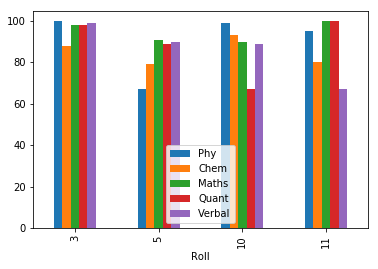

In [27]:
d8.plot(kind='bar')
plt.show()